Importing dependencies

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
#Data collection
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [33]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [34]:
gold_data['Next_GLD'] = gold_data['GLD'].shift(-1)

Let's see if the next day gold price change can be predicted with the change in gold price and other asset today.

In [37]:
gold_data = gold_data.drop('Date', axis =1).pct_change()

In [38]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,Next_GLD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.008367,-0.001274,0.006917,0.001902,-0.005142
2,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,-0.004229
3,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,0.023711
4,-0.018352,0.023711,0.007417,0.035674,0.060478,-0.002650


In [39]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD,Next_GLD
2285,-0.000266,0.000161,-0.002837,-0.000644,-0.005518,-0.002087
2286,0.009682,-0.002087,0.022048,0.001289,-0.001742,0.006837
2287,0.009371,0.006837,0.002784,0.013522,0.005935,-0.005512
2288,0.002593,-0.005512,-0.002082,-0.011436,0.001145,-0.015633
2289,-0.001593,-0.015633,0.001794,-0.006799,-0.009291,0.000000


In [40]:
gold_data.dropna(axis = 0, inplace=True)

In [41]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,Next_GLD
1,0.000000,0.008367,-0.001274,0.006917,0.001902,-0.005142
2,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,-0.004229
3,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,0.023711
4,-0.018352,0.023711,0.007417,0.035674,0.060478,-0.002650
5,0.013624,-0.002650,-0.010649,-0.004490,-0.058245,0.019642


In [42]:
gold_data.shape

(2289, 6)

In [43]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2289 entries, 1 to 2289
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SPX       2289 non-null   float64
 1   GLD       2289 non-null   float64
 2   USO       2289 non-null   float64
 3   SLV       2289 non-null   float64
 4   EUR/USD   2289 non-null   float64
 5   Next_GLD  2289 non-null   float64
dtypes: float64(6)
memory usage: 125.2 KB


In [44]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD,Next_GLD
count,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000
mean,0.000369,0.000244,-0.000460,0.000252,-0.000053,0.000241
std,0.013582,0.012931,0.023667,0.021975,0.009321,0.012929
min,-0.090350,-0.130685,-0.110739,-0.172659,-0.133526,-0.130685
25%,-0.004141,-0.005693,-0.012702,-0.009227,-0.003920,-0.005693
50%,0.000757,0.000494,0.000298,0.000634,-0.000071,0.000482
75%,0.006030,0.006418,0.012062,0.010914,0.003875,0.006390
max,0.107890,0.112905,0.139068,0.144231,0.173080,0.112905


In [45]:
correlation = gold_data.corr()

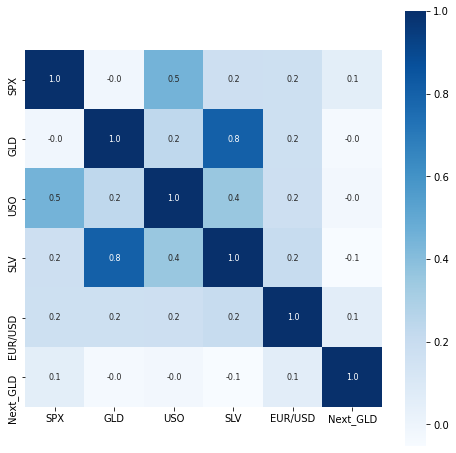

In [46]:
#a heatmap of the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square=True, fmt='.1f', annot = True, annot_kws = {'size': 8}, cmap='Blues' )

In [47]:
# correlation values
print(correlation['Next_GLD'])

SPX         0.055920
GLD        -0.033389
USO        -0.021412
SLV        -0.052020
EUR/USD     0.059494
Next_GLD    1.000000
Name: Next_GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


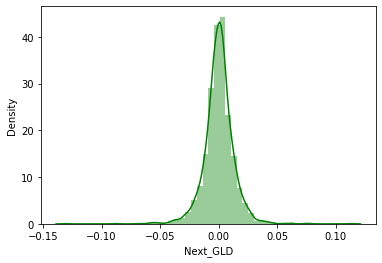

In [48]:
#Distribution of the gold price change
sns.distplot(gold_data['Next_GLD'], color='green')

Splitting the features and Target

In [49]:
X = gold_data.drop(['Next_GLD'], axis = 1)
Y = gold_data['Next_GLD']

In [64]:
print(X)
print(Y)

           SPX       GLD       USO       SLV   EUR/USD
1     0.000000  0.008367 -0.001274  0.006917  0.001902
2    -0.024552 -0.005142 -0.013526 -0.007720  0.000679
3     0.003223 -0.004229 -0.023412 -0.007516 -0.004875
4    -0.018352  0.023711  0.007417  0.035674  0.060478
5     0.013624 -0.002650 -0.010649 -0.004490 -0.058245
...        ...       ...       ...       ...       ...
2285 -0.000266  0.000161 -0.002837 -0.000644 -0.005518
2286  0.009682 -0.002087  0.022048  0.001289 -0.001742
2287  0.009371  0.006837  0.002784  0.013522  0.005935
2288  0.002593 -0.005512 -0.002082 -0.011436  0.001145
2289 -0.001593 -0.015633  0.001794 -0.006799 -0.009291

[2289 rows x 5 columns]
1      -0.005142
2      -0.004229
3       0.023711
4      -0.002650
5       0.019642
          ...   
2285   -0.002087
2286    0.006837
2287   -0.005512
2288   -0.015633
2289    0.000000
Name: Next_GLD, Length: 2289, dtype: float64


Shuffle is set to False. So the last 20% of the data will be used to evaluate the model.

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, , shuffle=False)

In [74]:
print(X.shape, X_test.shape, X_train.shape)

(2289, 5) (229, 5) (2060, 5)


In [75]:
X_train.tail()

,SPX,GLD,USO,SLV,EUR/USD
2056,-0.001716,-0.008875,-0.038043,-0.009227,-0.001275
2057,0.007557,0.001889,-0.007533,-0.006985,-0.000010
2058,0.007772,-0.003936,-0.027514,-0.004689,0.013994
2059,0.006091,-0.010125,0.010732,-0.017668,0.005836
2060,-0.000486,0.004906,-0.009653,-0.006595,-0.001768


In [76]:
X_test.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,-0.000266,0.000161,-0.002837,-0.000644,-0.005518
2286,0.009682,-0.002087,0.022048,0.001289,-0.001742
2287,0.009371,0.006837,0.002784,0.013522,0.005935
2288,0.002593,-0.005512,-0.002082,-0.011436,0.001145
2289,-0.001593,-0.015633,0.001794,-0.006799,-0.009291


Model Training

Random Forest

In [77]:
regressor = RandomForestRegressor(n_estimators=100)

In [78]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Let's evaluate the model

In [79]:
X_train_prediction = regressor.predict(X_train)

In [80]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_train, X_train_prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_train, X_train_prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_train, X_train_prediction)))
print('r2 score:', metrics.r2_score (Y_train, X_train_prediction))

Mean Absolute Error (MAE): 0.0035887885185656152
Mean Squared Error (MSE): 2.718728497566219e-05
Root Mean Squared Error (RMSE): 0.005214142784357002
r2 score: 0.8494014510959866


In [81]:
X_test_prediction = regressor.predict(X_test)

In [82]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, X_test_prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test, X_test_prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_test, X_test_prediction)))
print('r2 score:', metrics.r2_score (Y_test, X_test_prediction))

Mean Absolute Error (MAE): 0.005618219738848784
Mean Squared Error (MSE): 5.204118853647096e-05
Root Mean Squared Error (RMSE): 0.007213957896776981
r2 score: -0.12492388035939639


R2  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


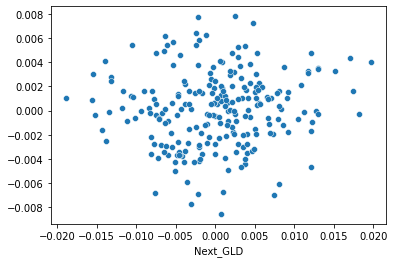

In [83]:
sns.scatterplot(Y_test, X_test_prediction)

Let's see if having a history of price changes as features helps with the prediction. Let's prepare the dataset first.

In [88]:
X

,SPX,GLD,USO,SLV,EUR/USD
1,0.000000,0.008367,-0.001274,0.006917,0.001902
2,-0.024552,-0.005142,-0.013526,-0.007720,0.000679
3,0.003223,-0.004229,-0.023412,-0.007516,-0.004875
4,-0.018352,0.023711,0.007417,0.035674,0.060478
5,0.013624,-0.002650,-0.010649,-0.004490,-0.058245
...,...,...,...,...,...
2285,-0.000266,0.000161,-0.002837,-0.000644,-0.005518
2286,0.009682,-0.002087,0.022048,0.001289,-0.001742
2287,0.009371,0.006837,0.002784,0.013522,0.005935
2288,0.002593,-0.005512,-0.002082,-0.011436,0.001145


For each asset, let's have the past 7 values as features.

In [92]:
column_names = X.columns
for i in range(1,8):
  for col in column_names:
    col_name = col + str(i)
    X[col_name] = X[col].shift(i)



In [93]:
X.head()

,SPX,GLD,USO,SLV,EUR/USD,SPX1,GLD1,USO1,SLV1,EUR/USD1,SPX2,GLD2,USO2,SLV2,EUR/USD2,SPX3,GLD3,USO3,SLV3,EUR/USD3,SPX4,GLD4,USO4,SLV4,EUR/USD4,SPX5,GLD5,USO5,SLV5,EUR/USD5,SPX6,GLD6,USO6,SLV6,EUR/USD6,SPX7,GLD7,USO7,SLV7,EUR/USD7
1,0.000000,0.008367,-0.001274,0.006917,0.001902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,0.000000,0.008367,-0.001274,0.006917,0.001902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,0.000000,0.008367,-0.001274,0.006917,0.001902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.018352,0.023711,0.007417,0.035674,0.060478,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,0.000000,0.008367,-0.001274,0.006917,0.001902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.013624,-0.002650,-0.010649,-0.004490,-0.058245,-0.018352,0.023711,0.007417,0.035674,0.060478,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,0.0,0.008367,-0.001274,0.006917,0.001902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
X.isnull().sum()

SPX         0
GLD         0
USO         0
SLV         0
EUR/USD     0
SPX1        1
GLD1        1
USO1        1
SLV1        1
EUR/USD1    1
SPX2        2
GLD2        2
USO2        2
SLV2        2
EUR/USD2    2
SPX3        3
GLD3        3
USO3        3
SLV3        3
EUR/USD3    3
SPX4        4
GLD4        4
USO4        4
SLV4        4
EUR/USD4    4
SPX5        5
GLD5        5
USO5        5
SLV5        5
EUR/USD5    5
SPX6        6
GLD6        6
USO6        6
SLV6        6
EUR/USD6    6
SPX7        7
GLD7        7
USO7        7
SLV7        7
EUR/USD7    7
dtype: int64

Let's remove the first 7 rows from X and Y and then train the model on the new dataset.

In [98]:
X.dropna(axis = 0, inplace=True)

In [100]:
X

,SPX,GLD,USO,SLV,EUR/USD,SPX1,GLD1,USO1,SLV1,EUR/USD1,SPX2,GLD2,USO2,SLV2,EUR/USD2,SPX3,GLD3,USO3,SLV3,EUR/USD3,SPX4,GLD4,USO4,SLV4,EUR/USD4,SPX5,GLD5,USO5,SLV5,EUR/USD5,SPX6,GLD6,USO6,SLV6,EUR/USD6,SPX7,GLD7,USO7,SLV7,EUR/USD7
8,0.010871,0.010838,0.015871,0.012627,0.005337,-0.013595,0.003739,-0.012564,0.000996,-0.000739,0.007948,0.019642,-0.016346,0.034858,0.009339,0.013624,-0.002650,-0.010649,-0.004490,-0.058245,-0.018352,0.023711,0.007417,0.035674,0.060478,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,-0.024552,-0.005142,-0.013526,-0.007720,0.000679,0.000000,0.008367,-0.001274,0.006917,0.001902
9,-0.024925,-0.017311,-0.019798,-0.027396,-0.004499,0.010871,0.010838,0.015871,0.012627,0.005337,-0.013595,0.003739,-0.012564,0.000996,-0.000739,0.007948,0.019642,-0.016346,0.034858,0.009339,0.013624,-0.002650,-0.010649,-0.004490,-0.058245,-0.018352,0.023711,0.007417,0.035674,0.060478,0.003223,-0.004229,-0.023412,-0.007516,-0.004875,-0.024552,-0.005142,-0.013526,-0.007720,0.000679
10,-0.005612,-0.014661,-0.012778,-0.011368,-0.009326,-0.024925,-0.017311,-0.019798,-0.027396,-0.004499,0.010871,0.010838,0.015871,0.012627,0.005337,-0.013595,0.003739,-0.012564,0.000996,-0.000739,0.007948,0.019642,-0.016346,0.034858,0.009339,0.013624,-0.002650,-0.010649,-0.004490,-0.058245,-0.018352,0.023711,0.007417,0.035674,0.060478,0.003223,-0.004229,-0.023412,-0.007516,-0.004875
11,-0.029093,-0.002307,-0.011413,0.004025,-0.001640,-0.005612,-0.014661,-0.012778,-0.011368,-0.009326,-0.024925,-0.017311,-0.019798,-0.027396,-0.004499,0.010871,0.010838,0.015871,0.012627,0.005337,-0.013595,0.003739,-0.012564,0.000996,-0.000739,0.007948,0.019642,-0.016346,0.034858,0.009339,0.013624,-0.002650,-0.010649,-0.004490,-0.058245,-0.018352,0.023711,0.007417,0.035674,0.060478
12,-0.006045,0.010636,0.007180,0.019915,-0.001505,-0.029093,-0.002307,-0.011413,0.004025,-0.001640,-0.005612,-0.014661,-0.012778,-0.011368,-0.009326,-0.024925,-0.017311,-0.019798,-0.027396,-0.004499,0.010871,0.010838,0.015871,0.012627,0.005337,-0.013595,0.003739,-0.012564,0.000996,-0.000739,0.007948,0.019642,-0.016346,0.034858,0.009339,0.013624,-0.002650,-0.010649,-0.004490,-0.058245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,-0.000266,0.000161,-0.002837,-0.000644,-0.005518,0.016313,0.002333,0.020260,0.003881,-0.004631,-0.002254,0.005095,0.010973,0.002594,0.003201,-0.007206,-0.000485,0.004409,0.011811,-0.003382,0.002549,-0.007063,-0.013768,-0.009103,-0.007422,-0.007083,-0.003041,0.002179,-0.012837,-0.002344,0.010434,-0.003509,0.003644,-0.001922,-0.005098,0.001837,-0.006496,0.002924,-0.009518,-0.005696
2286,0.009682,-0.002087,0.022048,0.001289,-0.001742,-0.000266,0.000161,-0.002837,-0.000644,-0.005518,0.016313,0.002333,0.020260,0.003881,-0.004631,-0.002254,0.005095,0.010973,0.002594,0.003201,-0.007206,-0.000485,0.004409,0.011811,-0.003382,0.002549,-0.007063,-0.013768,-0.009103,-0.007422,-0.007083,-0.003041,0.002179,-0.012837,-0.002344,0.010434,-0.003509,0.003644,-0.001922,-0.005098
2287,0.009371,0.006837,0.002784,0.013522,0.005935,0.009682,-0.002087,0.022048,0.001289,-0.001742,-0.000266,0.000161,-0.002837,-0.000644,-0.005518,0.016313,0.002333,0.020260,0.003881,-0.004631,-0.002254,0.005095,0.010973,0.002594,0.003201,-0.007206,-0.000485,0.004409,0.011811,-0.003382,0.002549,-0.007063,-0.013768,-0.009103,-0.007422,-0.007083,-0.003041,0.002179,-0.012837,-0.002344
2288,0.002593,-0.005512,-0.002082,-0.011436,0.001145,0.009371,0.006837,0.002784,0.013522,0.005935,0.009682,-0.002087,0.022048,0.001289,-0.001742,-0.000266,0.000161,-0.002837,-0.000644,-0.005518,0.016313,0.002333,0.020260,0.003881,-0.004631,-0.002254,0.005095,0.010973,0.002594,0.003201,-0.007206,-0.000485,0.004409,0.011811,-0.003382,0.002549,-0.007063,-0.013768,-0.009103,-0.007422


In [101]:
Y

1      -0.005142
2      -0.004229
3       0.023711
4      -0.002650
5       0.019642
          ...   
2285   -0.002087
2286    0.006837
2287   -0.005512
2288   -0.015633
2289    0.000000
Name: Next_GLD, Length: 2289, dtype: float64

In [105]:
Y = Y.iloc[7:]

In [106]:
Y

8      -0.017311
9      -0.014661
10     -0.002307
11      0.010636
12      0.008579
          ...   
2285   -0.002087
2286    0.006837
2287   -0.005512
2288   -0.015633
2289    0.000000
Name: Next_GLD, Length: 2282, dtype: float64

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = False, test_size = 0.2)

In [109]:
print(X_train.shape, X_test.shape, X.shape)

(1825, 40) (457, 40) (2282, 40)


In [110]:
regressor2 = RandomForestRegressor(n_estimators=200)

In [111]:
regressor2.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
Y_test_predict = regressor2.predict(X_test)

In [113]:
#r2 evaluation
metrics.r2_score(Y_test, Y_test_predict)


-0.06029965601415199